In [1]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("../../")
from mayavi import mlab
mlab.init_notebook('x3d',800,800)

Notebook initialized with x3d backend.


In [2]:
from focusadd.surface.Surface import Surface
from focusadd.coils.CoilSet import CoilSet

In [3]:
rs = np.load("../../focusadd/poincare/rs.npy", 'r')
zs = np.load("../../focusadd/poincare/zs.npy", 'r')

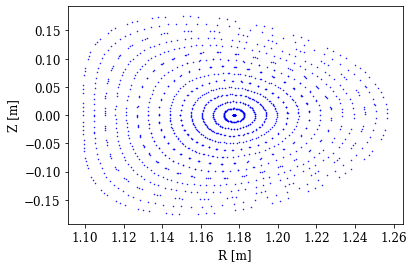

In [4]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.plot(rs,zs,'ko', markersize=0.5, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.show()

In [5]:
def getSurface(NZ, NT):
    # Initialize the arguments to be used by the program
    return Surface("../../focusadd/initFiles/axes/ellipticalAxis4Rotate.txt", NZ, NT, 1.0)

In [6]:
surface = getSurface(20000, 1000)

/opt/anaconda3/envs/plot/lib/python3.7/site-packages/jax/lib/xla_bridge.py:125: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [7]:
r = surface.get_r()[:-1][:,:-1]

In [8]:
r.shape

(20000, 1000, 3)

In [9]:
x,y,z = np.transpose(r, (2,0,1))

In [10]:
x.shape

(20000, 1000)

In [11]:
eps = 1e-4
x0 = x[abs(y) < eps]
z0 = z[abs(y) < eps]
x1 = x0[x0 > 0.0]
z1 = z0[x0 > 0.0]

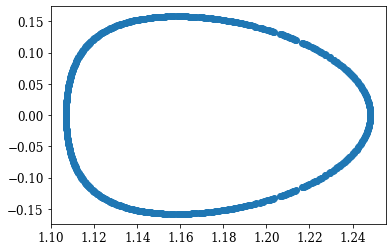

In [12]:
plt.scatter(x1, z1)
plt.show()

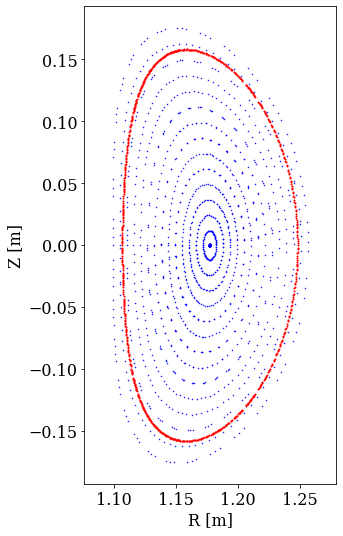

In [20]:
fig = plt.figure(figsize=(5.0,7.8))
ax1 = fig.add_axes([0.25, 0.1, 0.7, 0.85])
ax1.plot(rs,zs,'ko', markersize=0.5, color='blue')
ax1.plot(x1, z1, 'ko', markersize=1.0, color="red")

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
ax1.axis("equal")
plt.plot()
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.savefig("poincare_plot.eps")
plt.show()

In [ ]:


def plotSurface(NZ, NT, color = (0.8, 0.0, 0.0)):
    surface = getSurface(NZ, NT)
    r = surface.get_r()
    x = r[:,:,0]
    y = r[:,:,1]
    z = r[:,:,2]
    y_new = np.concatenate((np.zeros(z[0].shape)[None,:], np.zeros(z[0].shape)[None, :] + 1e-2), axis=0)
    s = mlab.mesh(x[:5],y[:5],z[:5],color=color)
    s = mlab.mesh(x[123:],y[123:],z[123:],color=color)
    s = mlab.mesh(np.asarray([[0.5, 1.5],[0.5, 1.5]]), np.asarray([[0,0],[0,0]]), np.asarray([[-0.5,-0.5],[0.5,0.5]]))
    return s

In [ ]:
mlab.clf()
plotSurface(128,32)

# W7X

In [ ]:
rs = np.load("../../focusadd/poincare/rs_w7x_fb.npy", 'r')
zs = np.load("../../focusadd/poincare/zs_w7x_fb.npy", 'r')
rs_fil = np.load("../../focusadd/poincare/rs_w7x_fil.npy", 'r')
zs_fil = np.load("../../focusadd/poincare/zs_w7x_fil.npy", 'r')
rs_fil2 = np.load("../../focusadd/poincare/rs_w7x_fil2.npy", 'r')
zs_fil2 = np.load("../../focusadd/poincare/zs_w7x_fil2.npy", 'r')
rs_islands = np.load("../../focusadd/poincare/rs_w7x_fb_islands.npy", 'r')
zs_islands = np.load("../../focusadd/poincare/zs_w7x_fb_islands.npy", 'r')
rs_fil_islands = np.load("../../focusadd/poincare/rs_w7x_fil_islands.npy", 'r')
zs_fil_islands = np.load("../../focusadd/poincare/zs_w7x_fil_islands.npy", 'r')
rs_fil2_islands = np.load("../../focusadd/poincare/rs_w7x_fil2_islands.npy", 'r')
zs_fil2_islands = np.load("../../focusadd/poincare/zs_w7x_fil2_islands.npy", 'r')
rs_fil2_islands2 = np.load("../../focusadd/poincare/rs_w7x_fil2_islands2.npy", 'r')
zs_fil2_islands2 = np.load("../../focusadd/poincare/zs_w7x_fil2_islands2.npy", 'r')

In [ ]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}
target_surface = np.load("w7x/w7x_target_boundary.npy")
plt.figure(figsize=(4.5,7.8))
plt.plot(target_surface[:,0], target_surface[:,1], color="red")
plt.rc('font', **font)
plt.axis('equal')
plt.plot(rs_fil_islands,zs_fil_islands,'ko', markersize=1.0, color='blue')
#plt.plot(rs_fil,zs_fil,'ko', markersize=1.0, color='blue')
x = [5.6,  5.6,    5.45,  5.46,  5.6, 5.6,  5.48,  5.49]
z = [0.89, -0.89, 0.73, -0.71, 0.92, -0.92, 0.73, -0.71]
plt.scatter(x,z)
plt.xlabel("R [m]")
plt.ylabel("Z [m]")
plt.show()

In [ ]:
def read_w7x_data():
	r_surf = np.load("../../focusadd/initFiles/w7x/w7x_r_surf.npy")
	nn = np.load("../../focusadd/initFiles/w7x/w7x_nn_surf.npy")
	sg = np.load("../../focusadd/initFiles/w7x/w7x_sg_surf.npy")
	fc_init = np.load("../../focusadd/initFiles/w7x/w7x_fc.npy")
	return r_surf, nn, sg, fc_init

In [ ]:
r, nn, sg, _ = read_w7x_data()

In [ ]:
def plot_surface(r):
	x = r[:,:,0]
	y = r[:,:,1]
	z = r[:,:,2]
	p = mlab.mesh(x,y,z,color=(0.8,0.0,0.0))
	return p


In [ ]:
#mlab.clf()
#x = r[:,:,0]
#y = r[:,:,1]
#z = r[:,:,2]
#p = mlab.mesh(x[0:5],y[0:5],z[0:5],color=(0.8,0.0,0.0))
#p = mlab.mesh(x[145:],y[145:],z[145:],color=(0.8,0.0,0.0))
#p = mlab.mesh(np.asarray([[5.5,5.5],[6.5,6.5]]), np.asarray([[0.0,0.0],[0.0,0.0]]), np.asarray([[-0.5,0.5],[-0.5,0.5]]))
#p

In [ ]:
target_surface = np.load("w7x/w7x_target_boundary.npy")

In [ ]:
fig = plt.figure(figsize=(4.5,7.8))
ax1 = fig.add_axes([0.25, 0.1, 0.7, 0.85])
ax1.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.axis('equal')
plt.plot(rs,zs,'ko', markersize=1.0, color='blue')
plt.plot(rs_islands[:122],zs_islands[:122],'ko', markersize=1.0, color='blue')
plt.plot(rs_islands[244:],zs_islands[244:],'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.savefig("poincare_w7x_fb.eps")
plt.show()

In [ ]:
fig = plt.figure(figsize=(4.5,7.8))
ax1 = fig.add_axes([0.25, 0.1, 0.7, 0.85])
ax1.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.axis('equal')
plt.plot(rs_fil,zs_fil,'ko', markersize=1.0, color='blue')
plt.plot(rs_fil_islands,zs_fil_islands,'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.savefig("poincare_w7x_fil18.eps")
plt.show()

In [ ]:
fig = plt.figure(figsize=(4.5,7.8))
ax1 = fig.add_axes([0.25, 0.1, 0.7, 0.85])
ax1.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
plt.axis('equal')
plt.plot(rs_fil2,zs_fil2,'ko', markersize=1.0, color='blue')
#plt.plot(rs_fil2_islands,zs_fil2_islands,'ko', markersize=1.0, color='blue')
plt.plot(rs_fil2_islands[:122],zs_fil2_islands[:122],'ko', markersize=1.0, color='blue')
plt.plot(rs_fil2_islands[244:],zs_fil2_islands[244:],'ko', markersize=1.0, color='blue')
plt.plot(rs_fil2_islands2,zs_fil2_islands2,'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.savefig("poincare_w7x_fil36.eps")
plt.show()

# LHD

In [ ]:
rs4 = np.load("../../focusadd/poincare/rs_LHD_fb4.npy", 'r')
zs4 = np.load("../../focusadd/poincare/zs_LHD_fb4.npy", 'r')
rs_fil4 = np.load("../../focusadd/poincare/rs_LHD_fil4.npy", 'r')
zs_fil4 = np.load("../../focusadd/poincare/zs_LHD_fil4.npy", 'r')
rs_fil = np.load("../../focusadd/poincare/rs_LHD_fil.npy", 'r')
zs_fil = np.load("../../focusadd/poincare/zs_LHD_fil.npy", 'r')
target_surface = np.load("../lhd/lhd_target_boundary.npy")

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.plot(rs4,zs4,'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.show()

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.plot(rs_fil,zs_fil,'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(target_surface[:,0], target_surface[:,1], color="red")
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.plot(rs_fil4,zs_fil4,'ko', markersize=1.0, color='blue')
plt.xlabel("R [m]")
plt.ylabel("Z [m]")

plt.show()